In [54]:

#EDA는 VS CODE에서 수행하여 csv파일을 따로 만들었습니다.

'''
import pandas as pd

df = pd.read_csv('games_ANSI.csv', encoding='ANSI')
#df = pd.read_csv('games.csv', encoding='utf8')

#필요없는 열 제거
df = df.drop(['AppID','Estimated owners','Required age','About the game','Full audio languages'\
,'Reviews','Header image','Website','Support url','Support email','Windows','Mac','Linux'\
,'Metacritic score','Metacritic url','User score','Score rank','Recommendations'\
,'Notes','Average playtime two weeks','Median playtime two weeks', 'Developers'\
, 'Publishers', 'Screenshots', 'Movies'], axis = 1)

# Price 값이 0인 행 제거
df = df[~df['Price'].isin([0])]

# Average playtime forever 값이 0인 행 제거
df = df[~df['Average playtime forever'].isin([0])]

# Median playtime forever 값이 0인 행 제거
df = df[~df['Median playtime forever'].isin([0])]

# 긍정적과 부정적 지표를 합친 all_Review 컬럼을 생성하고 값이 10보다 작다면 제거
df['all_Review'] = df['Positive'] + df['Negative']
ridx = df[df['all_Review'] < 10].index
df = df.drop(ridx, inplace = False)

# 유저들의 선호도를 나타내는 컬럼인 rate를 생성하고 0.7보다 작다면 제거
df['rate'] = (df['Positive'])/(df['all_Review'])
idx = df[df['rate'] < 0.7].index
df = df.drop(idx, inplace = False)

# 게임의 여러 특성을 담은 컬럼인 Attribute를 생성하고 중복되는 키워드는 제거
cols = ['Categories', 'Genres', 'Tags']
df['Attribute'] =df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

def remove_dup(x):
    l = x.split(',')
    s = set(l)
    nl = list(s)
    for i in nl:
        if i == 'nan':
            nl.remove(i)
    return nl

df['Attribute'] = df['Attribute'].map(remove_dup)

# 지원 언어의 개수를 나타내는 컬럼인 Count Supported languages 생성
def count_SL(x):
    for i in x:
        c = x.count(',')
    return c+1

df['Count Supported languages'] = df['Supported languages'].map(count_SL)

# 출시 날짜를 정수 데이터로 변환
df = df.replace({'Release date': {'-': ''}}, regex=True)
df['Release date'] = df['Release date'].astype(str)

def r_c(x):
    a = x[0:4]
    return a

df['Release date'] = df['Release date'].map(r_c)
df['Release date'] = df['Release date'].astype(int)

# Peak CCU값이 0이라면 1로 변환
def ccu(x):
    if x == 0:
        x += 1
    return x
    
df['Peak CCU'] = df['Peak CCU'].map(ccu)

df = df.drop(['Categories','Genres','Tags','Supported languages'], axis = 1)
#df.to_csv('games_ANSI_EDA.csv', index=False, encoding='ANSI')
df.to_csv('games_EDA.csv', index=False, encoding='utf8')

'''

"\nimport pandas as pd\n\ndf = pd.read_csv('games_ANSI.csv', encoding='ANSI')\n#df = pd.read_csv('games.csv', encoding='utf8')\n\n#필요없는 열 제거\ndf = df.drop(['AppID','Estimated owners','Required age','About the game','Full audio languages','Reviews','Header image','Website','Support url','Support email','Windows','Mac','Linux','Metacritic score','Metacritic url','User score','Score rank','Recommendations','Notes','Average playtime two weeks','Median playtime two weeks', 'Developers', 'Publishers', 'Screenshots', 'Movies'], axis = 1)\n\n# Price 값이 0인 행 제거\ndf = df[~df['Price'].isin([0])]\n\n# Average playtime forever 값이 0인 행 제거\ndf = df[~df['Average playtime forever'].isin([0])]\n\n# Median playtime forever 값이 0인 행 제거\ndf = df[~df['Median playtime forever'].isin([0])]\n\n# 긍정적과 부정적 지표를 합친 all_Review 컬럼을 생성하고 값이 10보다 작다면 제거\ndf['all_Review'] = df['Positive'] + df['Negative']\nridx = df[df['all_Review'] < 10].index\ndf = df.drop(ridx, inplace = False)\n\n# 유저들의 선호도를 나타내는 컬럼인 rate를 생성하고 0.7보

In [55]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

files.upload()
df = pd.read_csv('games_EDA.csv', encoding='utf8')

Saving games_EDA.csv to games_EDA (1).csv


In [56]:
df.head()

,Name,Release date,Peak CCU,Price,DLC count,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,all_Review,rate,Attribute,Count Supported languages
0,Deadlings: Rotten Edition,2014,1,3.99,0,225,45,32,703,782,270,0.833333,"['Single-player', 'Zombies', 'Arcade', 'Indie'...",9
1,WARSAW,2019,5,23.99,0,589,212,34,67,93,801,0.735331,"['Difficult', 'Historical', 'Perma Death', 'Wo...",5
2,Royal Battleships,2018,1,2.99,0,36,11,19,11,11,47,0.765957,"['Single-player', 'Indie', 'Steam Achievements...",1
3,Alien Breed 3: Descent,2010,3,9.99,0,349,134,13,44,24,483,0.722567,"['Singleplayer', 'Stats', 'Steam Leaderboards'...",6
4,Hero of the Kingdom II,2015,5,7.99,0,2046,120,48,280,303,2166,0.944598,"['Singleplayer', 'Medieval', 'Point & Click', ...",15


In [57]:
idxa = df[df['Price'] >= 70].index
idxb = df[df['Average playtime forever'] >= 30000].index
df = df.drop(idxa)
df = df.drop(idxb)

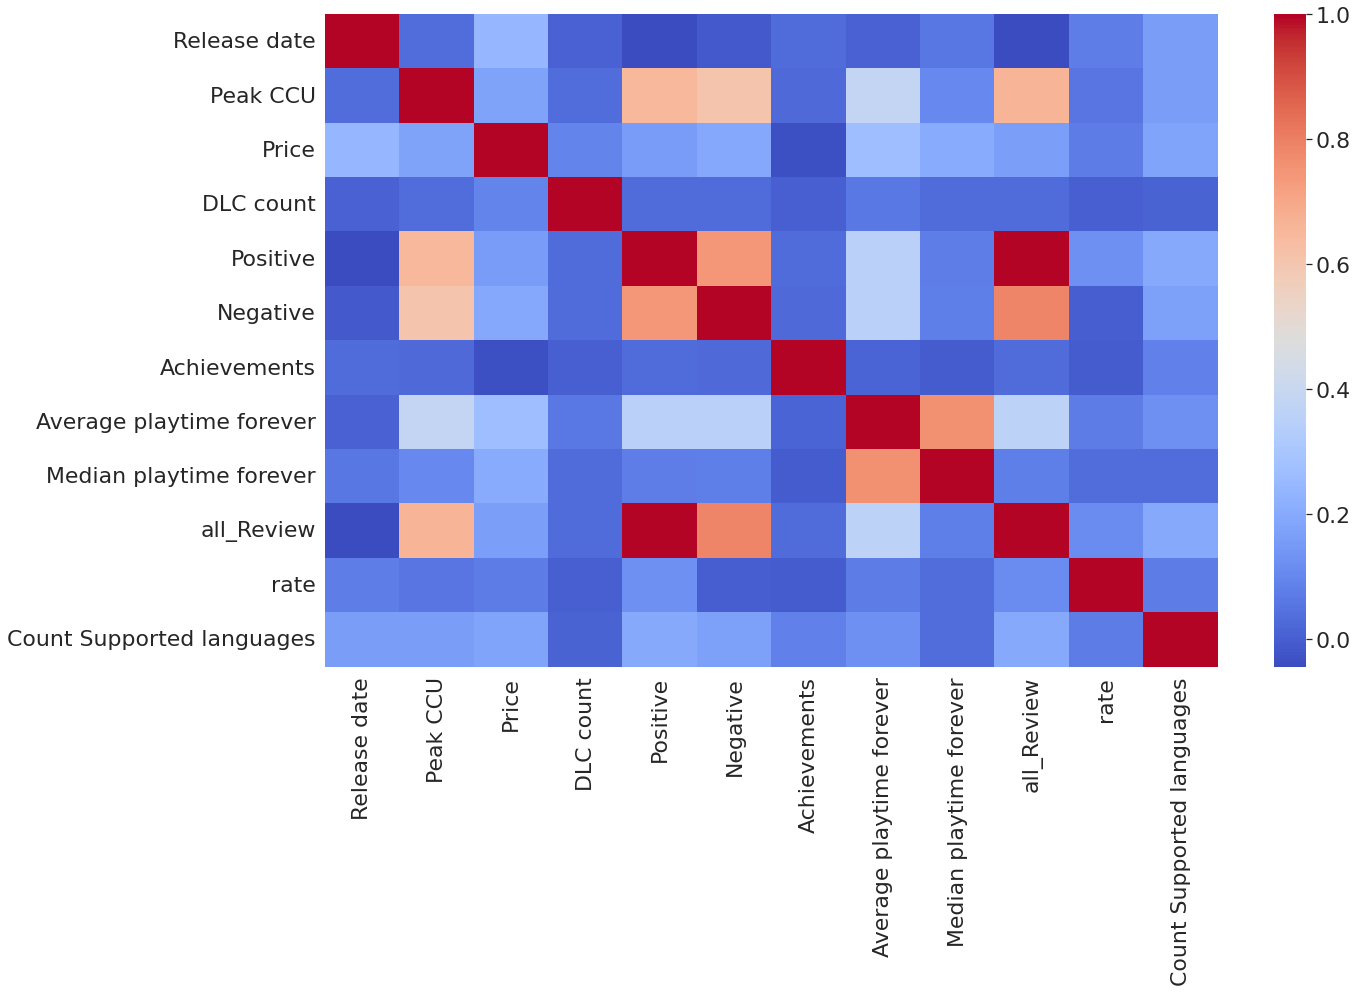

In [58]:
sns.set(font_scale = 2, rc = {'figure.figsize':(20,12)})
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [59]:
df.corr()

,Release date,Peak CCU,Price,DLC count,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,all_Review,rate,Count Supported languages
Release date,1.000000,0.034657,0.242248,0.006202,-0.043883,-0.010356,0.031433,0.006381,0.061519,-0.041360,0.077747,0.161691
Peak CCU,0.034657,1.000000,0.176727,0.034123,0.651482,0.611791,0.026562,0.386181,0.104926,0.663437,0.057310,0.162919
Price,0.242248,0.176727,1.000000,0.091300,0.157781,0.192719,-0.032503,0.268226,0.201847,0.165482,0.070921,0.182441
DLC count,0.006202,0.034123,0.091300,1.000000,0.031099,0.032494,0.001424,0.063788,0.030779,0.032024,0.003863,0.009431
Positive,-0.043883,0.651482,0.157781,0.031099,1.000000,0.744928,0.032123,0.353706,0.076941,0.997407,0.125126,0.198513
Negative,-0.010356,0.611791,0.192719,0.032494,0.744928,1.000000,0.029293,0.353840,0.079883,0.791010,-0.001430,0.172019
Achievements,0.031433,0.026562,-0.032503,0.001424,0.032123,0.029293,1.000000,0.014903,-0.004025,0.032618,-0.004389,0.086144
Average playtime forever,0.006381,0.386181,0.268226,0.063788,0.353706,0.353840,0.014903,1.000000,0.761017,0.362536,0.071455,0.126290
Median playtime forever,0.061519,0.104926,0.201847,0.030779,0.076941,0.079883,-0.004025,0.761017,1.000000,0.079176,0.034871,0.034819
all_Review,-0.041360,0.663437,0.165482,0.032024,0.997407,0.791010,0.032618,0.362536,0.079176,1.000000,0.114592,0.200602


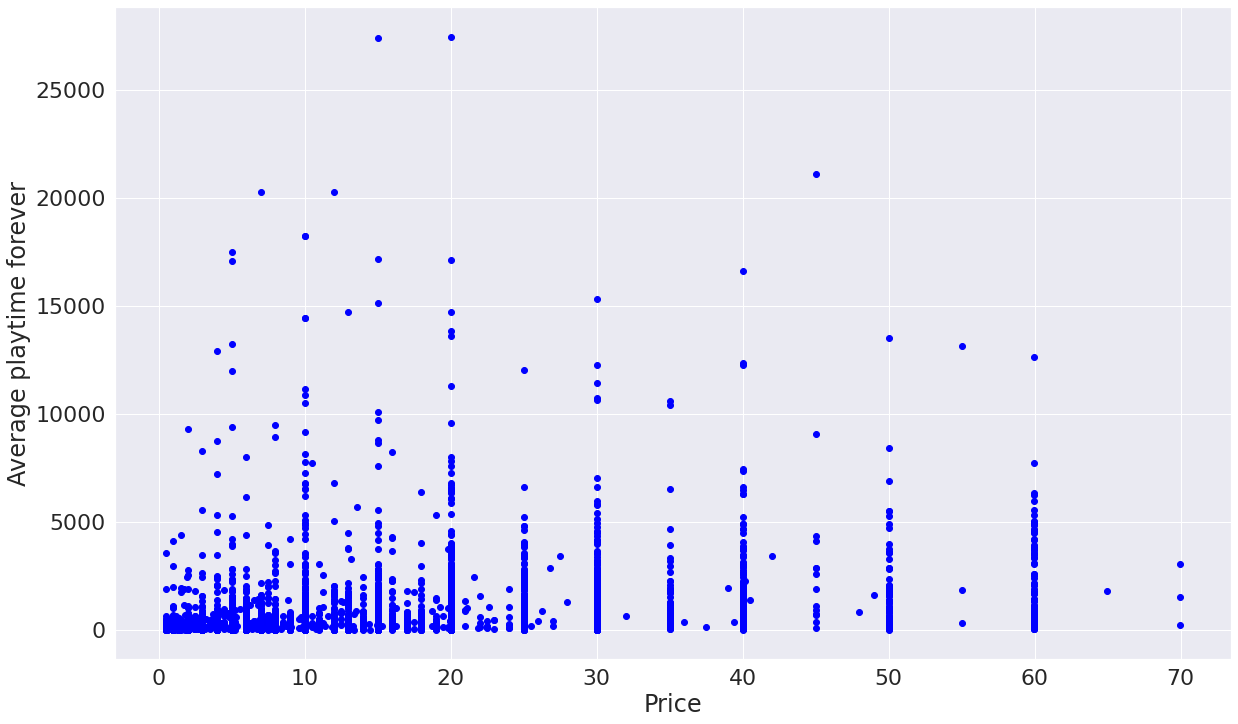

In [60]:
#x_value = df['Peak CCU']
#y_value = df['Positive']
x_value = df['Price']
y_value = df['Average playtime forever']
plt.xlabel('Price')
plt.ylabel('Average playtime forever')
plt.plot(x_value, y_value, 'o', color='blue');

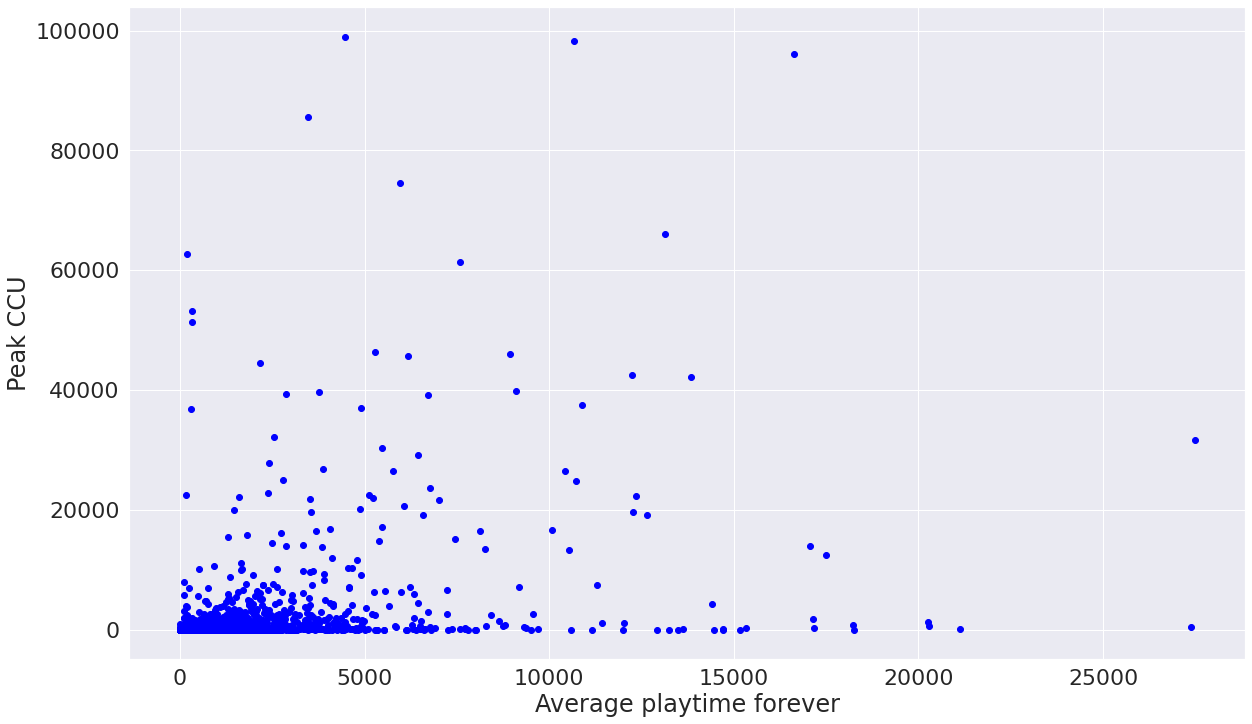

In [61]:
x_value = df['Average playtime forever']
y_value = df['Peak CCU']
plt.xlabel('Average playtime forever')
plt.ylabel('Peak CCU')
plt.plot(x_value, y_value, 'o', color='blue');

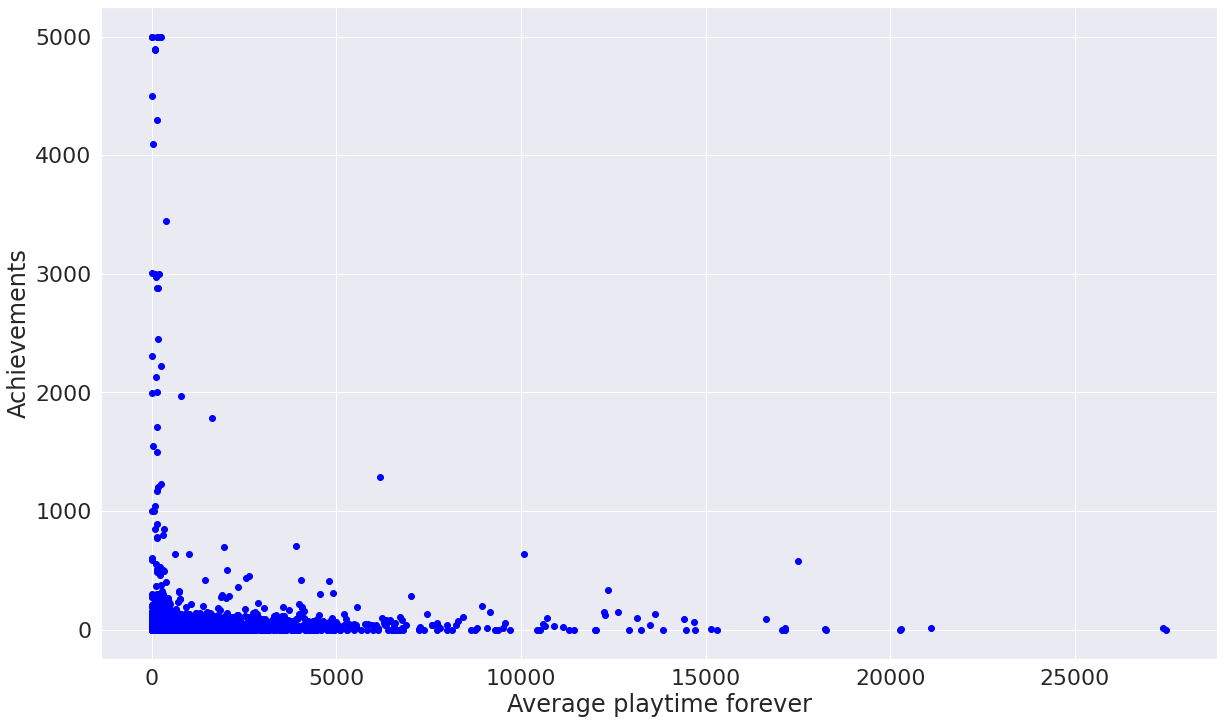

In [62]:
x_value = df['Average playtime forever']
y_value = df['Achievements']
plt.xlabel('Average playtime forever')
plt.ylabel('Achievements')
plt.plot(x_value, y_value, 'o', color='blue');

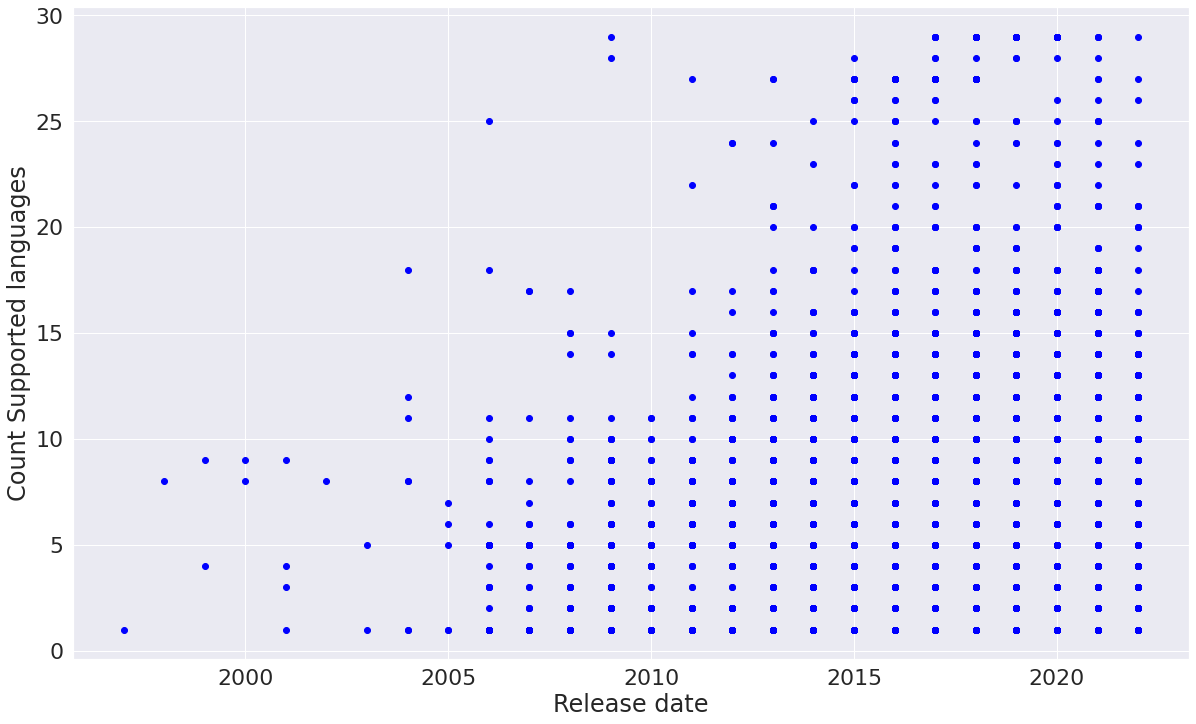

In [63]:
x_value = df['Release date']
y_value = df['Count Supported languages']
plt.xlabel('Release date')
plt.ylabel('Count Supported languages')
plt.plot(x_value, y_value, 'o', color='blue');

In [64]:
df_Indie = df[df['Attribute'].str.contains("Indie", na=False, case=False)]
#df_Indie.reset_index()

In [65]:
df_Indie.head()

,Name,Release date,Peak CCU,Price,DLC count,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,all_Review,rate,Attribute,Count Supported languages
0,Deadlings: Rotten Edition,2014,1,3.99,0,225,45,32,703,782,270,0.833333,"['Single-player', 'Zombies', 'Arcade', 'Indie'...",9
1,WARSAW,2019,5,23.99,0,589,212,34,67,93,801,0.735331,"['Difficult', 'Historical', 'Perma Death', 'Wo...",5
2,Royal Battleships,2018,1,2.99,0,36,11,19,11,11,47,0.765957,"['Single-player', 'Indie', 'Steam Achievements...",1
4,Hero of the Kingdom II,2015,5,7.99,0,2046,120,48,280,303,2166,0.944598,"['Singleplayer', 'Medieval', 'Point & Click', ...",15
5,Aerofly FS 2 Flight Simulator,2017,19,37.49,23,1490,408,0,127,127,1898,0.785037,"['Singleplayer', 'Racing', '3D Vision', 'Track...",3


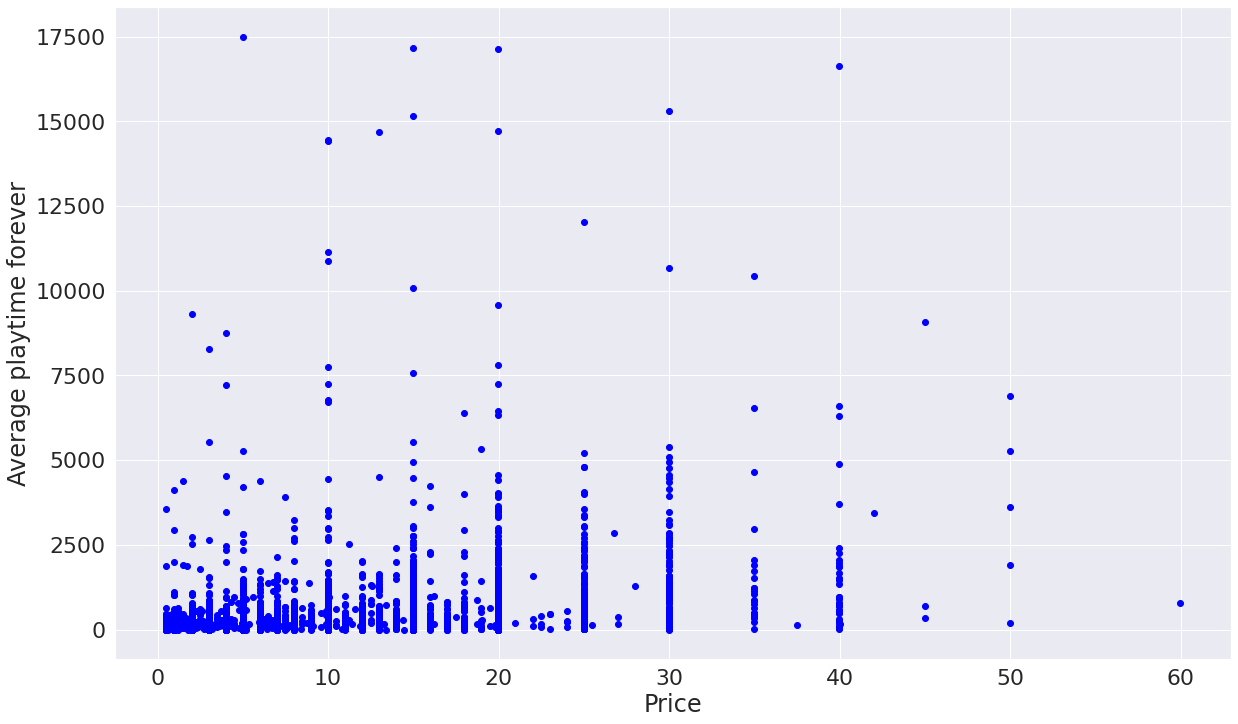

In [66]:
x_value = df_Indie['Price']
y_value = df_Indie['Average playtime forever']
plt.xlabel('Price')
plt.ylabel('Average playtime forever')
plt.plot(x_value, y_value, 'o', color='blue');

In [67]:
df_Indie.sort_values(by='Price', ascending=False).groupby('Name').head()

,Name,Release date,Peak CCU,Price,DLC count,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,all_Review,rate,Attribute,Count Supported languages
683,We Happy Few,2018,165,59.99,4,8334,2619,70,781,528,10953,0.760887,"['Singleplayer', 'Steam Workshop', 'Procedural...",9
1315,Squad,2020,9873,49.99,2,97784,13416,0,3615,922,111200,0.879353,"['Steam Workshop', 'Base-Building', 'Action', ...",1
5500,"Warhammer 40,000: Inquisitor - Martyr",2018,592,49.99,20,11207,3721,76,1921,838,14928,0.750737,"['Singleplayer', 'Online Co-op', 'Action', 'Fu...",11
2981,Pathfinder: Wrath of the Righteous,2021,6238,49.99,8,17093,3084,89,5264,5152,20177,0.847153,"['Singleplayer', 'Difficult', 'Choices Matter'...",6
4402,Desperados III,2020,312,49.99,5,9822,333,36,6896,13033,10155,0.967208,"['Singleplayer', 'Difficult', 'Historical', 'T...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Blaite,2017,11,0.49,0,353,138,6,192,236,491,0.718941,"['Difficult', 'Steam Leaderboards', 'Remote Pl...",2
1872,Rock 'N' Roll Defense,2016,33,0.49,1,1634,268,240,383,327,1902,0.859096,"['Singleplayer', 'GameMaker', 'Difficult', '19...",5
6842,Legend of Himari,2018,1,0.49,0,276,34,30,211,268,310,0.890323,"['Singleplayer', 'Side Scroller', 'In-App Purc...",2
7314,Reignfall,2018,1,0.49,0,308,37,24,54,54,345,0.892754,"['Single-player', 'Strategy', 'Hack and Slash'...",4


In [68]:
df_Indie.corr()

,Release date,Peak CCU,Price,DLC count,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,all_Review,rate,Count Supported languages
Release date,1.000000,0.021348,0.273471,0.001147,-0.036831,-0.016291,0.010410,0.039004,0.075729,-0.036031,0.134460,0.164974
Peak CCU,0.021348,1.000000,0.121005,0.008905,0.766494,0.757042,0.007145,0.383343,0.091927,0.786913,0.065123,0.127346
Price,0.273471,0.121005,1.000000,0.077629,0.124100,0.171997,-0.066096,0.234766,0.197141,0.131789,0.098081,0.134018
DLC count,0.001147,0.008905,0.077629,1.000000,0.012240,0.009598,-0.002149,0.031103,0.040195,0.012345,0.001318,-0.006728
Positive,-0.036831,0.766494,0.124100,0.012240,1.000000,0.662282,0.010526,0.383903,0.083929,0.997791,0.131858,0.158459
Negative,-0.016291,0.757042,0.171997,0.009598,0.662282,1.000000,0.007115,0.389764,0.079746,0.710592,0.011659,0.139995
Achievements,0.010410,0.007145,-0.066096,-0.002149,0.010526,0.007115,1.000000,0.012967,-0.000752,0.010516,-0.000867,0.090290
Average playtime forever,0.039004,0.383343,0.234766,0.031103,0.383903,0.389764,0.012967,1.000000,0.727501,0.395069,0.080036,0.123560
Median playtime forever,0.075729,0.091927,0.197141,0.040195,0.083929,0.079746,-0.000752,0.727501,1.000000,0.085886,0.051906,0.058200
all_Review,-0.036031,0.786913,0.131789,0.012345,0.997791,0.710592,0.010516,0.395069,0.085886,1.000000,0.124857,0.161217


In [69]:
# 플레이타임의 평균값 - 중간값을 나타내는 maniac칼럼을 만든 후 값이 큰 순서대로 나열
df['maniac'] = df['Average playtime forever'] - df['Median playtime forever']
df.sort_values(by='maniac', ascending=False).groupby('Name').head()

,Name,Release date,Peak CCU,Price,DLC count,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,all_Review,rate,Attribute,Count Supported languages,maniac
6440,FINAL FANTASY XIV Online,2014,31735,19.99,1,51918,6493,0,27478,3248,58411,0.888839,"['Singleplayer', 'Anime', 'Online Co-op', 'Act...",4,24230
2685,Wurm Unlimited,2015,206,29.99,0,2047,822,0,15317,288,2869,0.713489,"['Singleplayer', 'Medieval', 'Base-Building', ...",1,15029
3393,Primal Carnage: Extinction,2015,167,12.99,1,6258,1386,61,14696,666,7644,0.818681,"['Steam Workshop', 'Stats', 'In-App Purchases'...",4,14030
4973,Rust,2018,96112,39.99,4,703687,108223,90,16623,3035,811910,0.866706,"['Post-apocalyptic', 'Steam Workshop', 'Stats'...",25,13588
2645,Soundpad,2017,13945,4.99,0,41198,1427,0,17073,4054,42625,0.966522,"['Funny', 'Music', 'Software', 'Audio Producti...",25,13019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,Beasts of Bermuda,2018,1794,19.99,0,4107,1521,0,17147,25096,5628,0.729744,"['Multiplayer', 'Third Person', 'Horror', 'Rea...",20,-7949
3851,?机神?,2022,488,1.99,0,971,73,0,9306,18143,1044,0.930077,"['Procedural Generation', 'Word Game', 'Text-B...",1,-8837
1202,Sonicomi,2016,3,34.99,0,466,50,44,10593,21035,516,0.903101,"['Singleplayer', 'Anime', 'Memes', 'Hentai', '...",1,-10442
5449,Jagged Alliance 1: Gold Edition,2014,10,9.99,0,274,74,0,18250,34443,348,0.787356,"['Single-player', 'Strategy', 'Singleplayer', ...",1,-16193


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df[['Average playtime forever']]
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [71]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
pred = model.predict(x_test)

In [74]:
comparison = pd.DataFrame({'actual' : y_test, 'pred' : pred})
comparison

,actual,pred
764,1.99,17.702120
3157,39.99,17.722954
7989,6.99,12.049816
8600,14.99,12.210239
7740,19.99,12.874848
...,...,...
5773,9.99,12.264407
1416,3.99,12.097734
534,19.99,13.745715
3885,4.99,12.739426


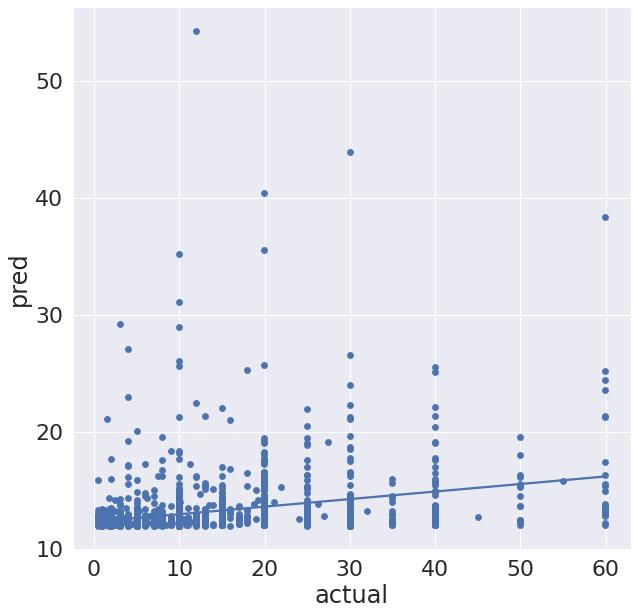

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)
sns.regplot(x = 'actual', y = 'pred', data = comparison, ci=None)

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, squared = False)

10.665706993798707